In [2]:
from sklearn import tree
import pandas as pd


In [3]:
df = pd.read_csv(r"C:\Users\Aaron\Documents\GW_Data_Course\AIsaacson_GW_HW\GW_Project2\sources\Quiz_results_29FEB_noon.csv")
df.head()

,Survey_ID,value,Data_Type,Chart_Type,Correct
0,9e22cd438d684a29a5e84044b83b6664a9152e35453014...,sq_101,categoryvsvalue,Bar,0
1,9e22cd438d684a29a5e84044b83b6664a9152e35453014...,sq_102,valuevslocation,Map,0
2,9e22cd438d684a29a5e84044b83b6664a9152e35453014...,sq_103,valuevstime,Rings,0
3,9e22cd438d684a29a5e84044b83b6664a9152e35453014...,sq_104,comparison,Bar,0
4,9e22cd438d684a29a5e84044b83b6664a9152e35453014...,sq_105,categoryvsvalue,Bubble,0


In [4]:
df_data=df[['Data_Type','Correct']]
df_target=df['Chart_Type']
df_target.unique()

array(['Bar', 'Map', 'Rings', 'Bubble', 'Table', 'Tree', 'Scatter', 'Pie',
       'Line'], dtype=object)

In [5]:
df_data_dummies = pd.get_dummies(df_data)
df_data_dummies.head()

,Correct,Data_Type_categoryvsvalue,Data_Type_comparison,Data_Type_valuevslocation,Data_Type_valuevstime,Data_Type_valuevsvalue
0,0,1,0,0,0,0
1,0,0,0,1,0,0
2,0,0,0,0,1,0
3,0,0,1,0,0,0
4,0,1,0,0,0,0


In [6]:
data_names = ['Number Correct','DimensionVsMeasure','Comparison','Dimension(Location)VsMeasure','Dimension(Time)VsMeasure','MeasureVsMeasure']
target_names = df_target.unique()

In [7]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(df_data_dummies, df_target)

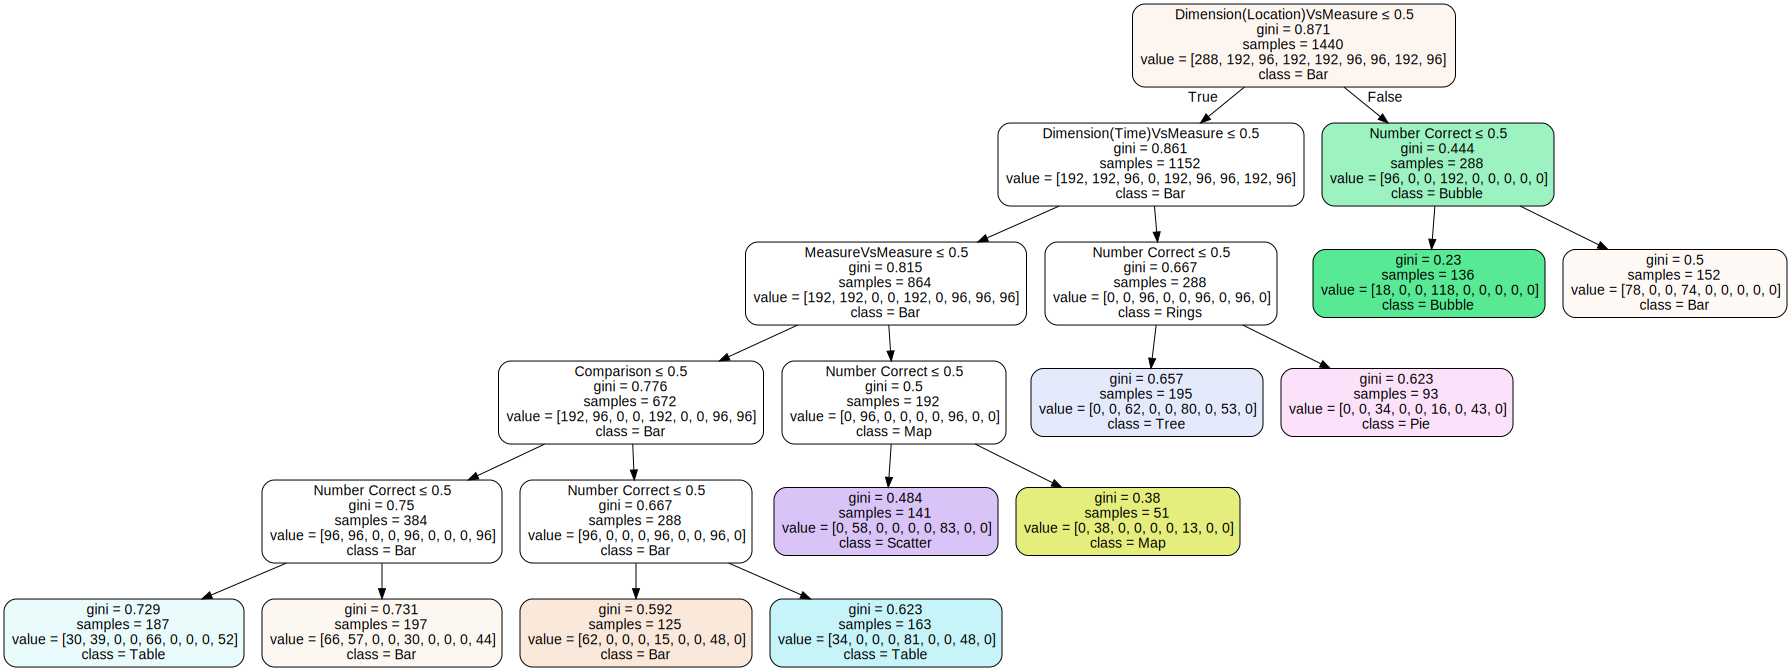

In [8]:
import graphviz 
dot_data = tree.export_graphviz(
    clf, out_file=None, 
    feature_names=data_names,  
    class_names=target_names,  
    filled=True, rounded=True,  
    special_characters=True)  

import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('charts.png')

graph = graphviz.Source(dot_data)  
graph 

In [9]:
from sklearn.tree.export import export_text
r = export_text(clf, feature_names=data_names)
print(r)
with open("quiz_decision_tree.txt", "w") as file:
    file.write(r)

|--- Dimension(Location)VsMeasure <= 0.50
|   |--- Dimension(Time)VsMeasure <= 0.50
|   |   |--- MeasureVsMeasure <= 0.50
|   |   |   |--- Comparison <= 0.50
|   |   |   |   |--- Number Correct <= 0.50
|   |   |   |   |   |--- class: Pie
|   |   |   |   |--- Number Correct >  0.50
|   |   |   |   |   |--- class: Bar
|   |   |   |--- Comparison >  0.50
|   |   |   |   |--- Number Correct <= 0.50
|   |   |   |   |   |--- class: Bar
|   |   |   |   |--- Number Correct >  0.50
|   |   |   |   |   |--- class: Pie
|   |   |--- MeasureVsMeasure >  0.50
|   |   |   |--- Number Correct <= 0.50
|   |   |   |   |--- class: Scatter
|   |   |   |--- Number Correct >  0.50
|   |   |   |   |--- class: Bubble
|   |--- Dimension(Time)VsMeasure >  0.50
|   |   |--- Number Correct <= 0.50
|   |   |   |--- class: Rings
|   |   |--- Number Correct >  0.50
|   |   |   |--- class: Table
|--- Dimension(Location)VsMeasure >  0.50
|   |--- Number Correct <= 0.50
|   |   |--- class: Map
|   |--- Number Correct >

In [14]:
clf.predict([[1,1,0,0,0,0]])

array(['Bar'], dtype=object)